In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import sys
sys.path.append('../')

from glash_v2 import glash_discriminator, glash_generator, Glash
from helpers import toy_data, show_samples, make_animation

physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

2021-12-16 19:18:58.623451: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-12-16 19:18:59.964453: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-16 19:18:59.965170: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-16 19:19:00.019947: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-16 19:19:00.020205: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2021-12-16 19:19:00.020223: I tensorflow/stream_executor/platform/defa

2021-12-16 19:19:00.057607: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-16 19:19:00.058501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-16 19:19:00.058790: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.2GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2021-12-16 19:19:00.058815: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcu

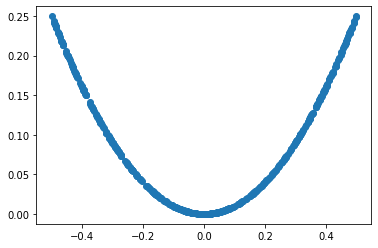

In [2]:
# Create the training dataset
data = toy_data(500, -0.5, 0.5)
data = data.astype('float32')
plt.scatter(data[:, 0], data[:, 1])

train_data = tf.data.Dataset.from_tensor_slices(data)
train_data = train_data.batch(64).prefetch(32)

(500, 2)


(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  7., 17., 13., 15.],
        [ 0.,  0.,  0., 11., 19., 12., 11.,  0.,  0.,  0.],
        [ 0.,  9., 22., 18.,  0.,  0.,  0.,  0.,  0.,  0.],
        [24., 21.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [19., 22.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  8., 25., 10.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 12., 20., 21.,  7.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., 10., 13., 13., 13.]]),
 array([-4.99650717e-01, -3.99748480e-01, -2.99846244e-01, -1.99944007e-01,
        -1.00041771e-01, -1.39534473e-04,  9.97627020e-02,  1.99664938e-01,
         2.99567175e-01,  3.99469411e-01,  4.99371648e-01]),
 array([4.91698869e-11, 2.49650836e-02, 4.99301672e-02, 7.48952508e-02,
        9.98603344e-02, 1.24825418e-01, 1.49790502e-01, 1.74755585e-01,
        1.99720669e-01, 2.24685752e-01, 2

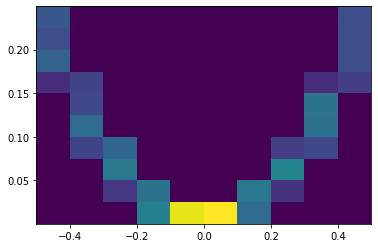

In [3]:
print(data.shape)
x = data[:, :1].reshape(500,)
y = data[:, 1:2].reshape(500,)
plt.hist2d(x, y)

In [4]:
glash = Glash(glash_discriminator(), glash_generator(act_fun_2=tf.keras.activations.tanh))
glash.compile(
    tf.keras.optimizers.Adam(),
    tf.keras.optimizers.Adam(),
    tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

In [5]:
generated_point_list = []

cbk = tf.keras.callbacks.LambdaCallback(on_epoch_end=lambda epoch, logs: show_samples(generated_point_list, epoch, glash.generator, data))

history = glash.fit(train_data, epochs=5000, callbacks=[cbk], verbose=True)

Epoch 1/5000


2021-12-16 19:19:01.206023: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-16 19:19:01.227786: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz
2021-12-16 19:19:01.305245: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


8/8 [==============================] - 1s 2ms/step - d_loss: 0.6402 - g_loss: 1.3175
Epoch 2/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6521 - g_loss: 1.1775
Epoch 3/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6738 - g_loss: 1.0731
Epoch 4/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6799 - g_loss: 1.0026
Epoch 5/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6741 - g_loss: 0.9573
Epoch 6/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6739 - g_loss: 0.9361
Epoch 7/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6617 - g_loss: 0.9477
Epoch 8/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6542 - g_loss: 0.9551
Epoch 9/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6347 - g_loss: 0.9944
Epoch 10/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6241 - g_loss: 1.0062
Epoch 11/5000
8/8 [=============

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6975 - g_loss: 0.6670
Epoch 84/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7030 - g_loss: 0.6568
Epoch 85/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6953 - g_loss: 0.6656
Epoch 86/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6830 - g_loss: 0.6893
Epoch 87/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6688 - g_loss: 0.7154
Epoch 88/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6577 - g_loss: 0.7377
Epoch 89/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6524 - g_loss: 0.7470
Epoch 90/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6532 - g_loss: 0.7462
Epoch 91/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6637 - g_loss: 0.7129
Epoch 92/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6985 - g_loss: 0.6507
Epoch 93/5000
8/8 [=====

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6685 - g_loss: 0.7358
Epoch 166/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6872 - g_loss: 0.6858
Epoch 167/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7198 - g_loss: 0.6253
Epoch 168/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7356 - g_loss: 0.6012
Epoch 169/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7252 - g_loss: 0.6334
Epoch 170/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7046 - g_loss: 0.6895
Epoch 171/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6889 - g_loss: 0.7329
Epoch 172/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6905 - g_loss: 0.7367
Epoch 173/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6965 - g_loss: 0.7290
Epoch 174/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6976 - g_loss: 0.7196
Epoch 175/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6643 - g_loss: 0.7263
Epoch 248/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6706 - g_loss: 0.7187
Epoch 249/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6808 - g_loss: 0.6916
Epoch 250/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7059 - g_loss: 0.6402
Epoch 251/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7379 - g_loss: 0.5942
Epoch 252/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7386 - g_loss: 0.6052
Epoch 253/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7149 - g_loss: 0.6679
Epoch 254/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.7300
Epoch 255/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6884 - g_loss: 0.7458
Epoch 256/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6957 - g_loss: 0.7350
Epoch 257/5000


8/8 [==============================] - 0s 3ms/step - d_loss: 0.6998 - g_loss: 0.6695
Epoch 330/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6952 - g_loss: 0.6801
Epoch 331/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6861 - g_loss: 0.6956
Epoch 332/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6766 - g_loss: 0.7193
Epoch 333/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6712 - g_loss: 0.7367
Epoch 334/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6668 - g_loss: 0.7402
Epoch 335/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6708 - g_loss: 0.7283
Epoch 336/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6745 - g_loss: 0.7164
Epoch 337/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6819 - g_loss: 0.6967
Epoch 338/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6986 - g_loss: 0.6577
Epoch 339/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.7358 - g_loss: 0.5933
Epoch 412/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7423 - g_loss: 0.5996
Epoch 413/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7167 - g_loss: 0.6742
Epoch 414/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6885 - g_loss: 0.7407
Epoch 415/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6890 - g_loss: 0.7466
Epoch 416/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6886 - g_loss: 0.7474
Epoch 417/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6818 - g_loss: 0.7542
Epoch 418/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6767 - g_loss: 0.7548
Epoch 419/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6715 - g_loss: 0.7546
Epoch 420/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6666 - g_loss: 0.7536
Epoch 421/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.7299 - g_loss: 0.6303
Epoch 494/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7033 - g_loss: 0.6912
Epoch 495/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6860 - g_loss: 0.7392
Epoch 496/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6805 - g_loss: 0.7526
Epoch 497/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6731 - g_loss: 0.7657
Epoch 498/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6660 - g_loss: 0.7754
Epoch 499/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6594 - g_loss: 0.7831
Epoch 500/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6533 - g_loss: 0.7881
Epoch 501/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6465 - g_loss: 0.7954
Epoch 502/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6402 - g_loss: 0.8022
Epoch 503/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6774 - g_loss: 0.7012
Epoch 576/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6707 - g_loss: 0.7060
Epoch 577/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6643 - g_loss: 0.7103
Epoch 578/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6594 - g_loss: 0.7124
Epoch 579/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6576 - g_loss: 0.7108
Epoch 580/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6598 - g_loss: 0.7037
Epoch 581/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6593 - g_loss: 0.6981
Epoch 582/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6588 - g_loss: 0.7007
Epoch 583/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6544 - g_loss: 0.7106
Epoch 584/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6481 - g_loss: 0.7251
Epoch 585/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6097 - g_loss: 0.8741
Epoch 658/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6127 - g_loss: 0.8593
Epoch 659/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6411 - g_loss: 0.7848
Epoch 660/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7139 - g_loss: 0.6320
Epoch 661/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8002 - g_loss: 0.4994
Epoch 662/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8264 - g_loss: 0.4753
Epoch 663/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8115 - g_loss: 0.4952
Epoch 664/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7806 - g_loss: 0.5461
Epoch 665/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7477 - g_loss: 0.6059
Epoch 666/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7205 - g_loss: 0.6548
Epoch 667/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.9096 - g_loss: 0.3980
Epoch 740/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8161 - g_loss: 0.5368
Epoch 741/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7205 - g_loss: 0.7357
Epoch 742/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6847 - g_loss: 0.8405
Epoch 743/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6993 - g_loss: 0.8014
Epoch 744/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7207 - g_loss: 0.7584
Epoch 745/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7088 - g_loss: 0.7731
Epoch 746/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6986 - g_loss: 0.7724
Epoch 747/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6932 - g_loss: 0.7561
Epoch 748/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6942 - g_loss: 0.7359
Epoch 749/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6737 - g_loss: 0.7281
Epoch 822/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6687 - g_loss: 0.7305
Epoch 823/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6642 - g_loss: 0.7333
Epoch 824/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6599 - g_loss: 0.7358
Epoch 825/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6557 - g_loss: 0.7400
Epoch 826/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6519 - g_loss: 0.7434
Epoch 827/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6478 - g_loss: 0.7485
Epoch 828/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6433 - g_loss: 0.7547
Epoch 829/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6390 - g_loss: 0.7613
Epoch 830/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6344 - g_loss: 0.7694
Epoch 831/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6501 - g_loss: 0.8037
Epoch 904/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6436 - g_loss: 0.8067
Epoch 905/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6361 - g_loss: 0.8136
Epoch 906/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6280 - g_loss: 0.8259
Epoch 907/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6188 - g_loss: 0.8420
Epoch 908/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6120 - g_loss: 0.8548
Epoch 909/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6060 - g_loss: 0.8633
Epoch 910/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6068 - g_loss: 0.8525
Epoch 911/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6325 - g_loss: 0.7889
Epoch 912/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6838 - g_loss: 0.6705
Epoch 913/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.7683 - g_loss: 0.5592
Epoch 986/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7459 - g_loss: 0.5978
Epoch 987/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7238 - g_loss: 0.6478
Epoch 988/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7007 - g_loss: 0.6942
Epoch 989/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6836 - g_loss: 0.7362
Epoch 990/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6714 - g_loss: 0.7708
Epoch 991/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6656 - g_loss: 0.7890
Epoch 992/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6637 - g_loss: 0.7800
Epoch 993/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6675 - g_loss: 0.7750
Epoch 994/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6682 - g_loss: 0.7591
Epoch 995/5000


8/8 [==============================] - 0s 2ms/step - d_loss: 0.6743 - g_loss: 0.7961
Epoch 1067/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6644 - g_loss: 0.7985
Epoch 1068/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6552 - g_loss: 0.8039
Epoch 1069/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6466 - g_loss: 0.8119
Epoch 1070/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6380 - g_loss: 0.8203
Epoch 1071/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6295 - g_loss: 0.8319
Epoch 1072/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6209 - g_loss: 0.8449
Epoch 1073/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6125 - g_loss: 0.8595
Epoch 1074/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6048 - g_loss: 0.8718
Epoch 1075/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5991 - g_loss: 0.8817
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6317 - g_loss: 0.8656
Epoch 1148/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6211 - g_loss: 0.8888
Epoch 1149/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6112 - g_loss: 0.9154
Epoch 1150/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6013 - g_loss: 0.9338
Epoch 1151/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5952 - g_loss: 0.9454
Epoch 1152/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5978 - g_loss: 0.9301
Epoch 1153/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6145 - g_loss: 0.8759
Epoch 1154/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6336 - g_loss: 0.8191
Epoch 1155/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6617 - g_loss: 0.7424
Epoch 1156/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7015 - g_loss: 0.6698
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6146 - g_loss: 0.7900
Epoch 1229/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6111 - g_loss: 0.7948
Epoch 1230/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6072 - g_loss: 0.7938
Epoch 1231/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6058 - g_loss: 0.7933
Epoch 1232/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6070 - g_loss: 0.7886
Epoch 1233/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6126 - g_loss: 0.7767
Epoch 1234/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6237 - g_loss: 0.7484
Epoch 1235/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6484 - g_loss: 0.6955
Epoch 1236/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.7022 - g_loss: 0.6141
Epoch 1237/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.7837 - g_loss: 0.5078
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6974 - g_loss: 0.8294
Epoch 1310/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6881 - g_loss: 0.8243
Epoch 1311/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6789 - g_loss: 0.8210
Epoch 1312/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6704 - g_loss: 0.8176
Epoch 1313/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6613 - g_loss: 0.8180
Epoch 1314/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6529 - g_loss: 0.8210
Epoch 1315/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6445 - g_loss: 0.8256
Epoch 1316/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6361 - g_loss: 0.8324
Epoch 1317/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6282 - g_loss: 0.8394
Epoch 1318/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6203 - g_loss: 0.8481
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6861 - g_loss: 0.8567
Epoch 1391/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6769 - g_loss: 0.8488
Epoch 1392/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6687 - g_loss: 0.8400
Epoch 1393/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6587 - g_loss: 0.8374
Epoch 1394/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6496 - g_loss: 0.8376
Epoch 1395/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6416 - g_loss: 0.8367
Epoch 1396/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6350 - g_loss: 0.8370
Epoch 1397/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6285 - g_loss: 0.8374
Epoch 1398/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6224 - g_loss: 0.8411
Epoch 1399/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6164 - g_loss: 0.8470
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.5907 - g_loss: 0.8712
Epoch 1472/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5907 - g_loss: 0.8666
Epoch 1473/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5903 - g_loss: 0.8560
Epoch 1474/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5967 - g_loss: 0.8439
Epoch 1475/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6033 - g_loss: 0.8217
Epoch 1476/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6136 - g_loss: 0.7879
Epoch 1477/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6359 - g_loss: 0.7473
Epoch 1478/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6630 - g_loss: 0.7035
Epoch 1479/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6889 - g_loss: 0.6422
Epoch 1480/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7264 - g_loss: 0.5796
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6212 - g_loss: 0.8596
Epoch 1553/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6158 - g_loss: 0.8634
Epoch 1554/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6108 - g_loss: 0.8693
Epoch 1555/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6056 - g_loss: 0.8736
Epoch 1556/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5996 - g_loss: 0.8798
Epoch 1557/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5930 - g_loss: 0.8876
Epoch 1558/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5875 - g_loss: 0.8943
Epoch 1559/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5848 - g_loss: 0.8917
Epoch 1560/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5907 - g_loss: 0.8682
Epoch 1561/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6072 - g_loss: 0.8249
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.7187 - g_loss: 0.6436
Epoch 1634/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7415 - g_loss: 0.6103
Epoch 1635/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7537 - g_loss: 0.6146
Epoch 1636/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7683 - g_loss: 0.5714
Epoch 1637/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7753 - g_loss: 0.5615
Epoch 1638/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7617 - g_loss: 0.5783
Epoch 1639/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7473 - g_loss: 0.6068
Epoch 1640/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.7265 - g_loss: 0.6348
Epoch 1641/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7050 - g_loss: 0.6640
Epoch 1642/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6879 - g_loss: 0.6996
Epoch 

8/8 [==============================] - 0s 3ms/step - d_loss: 0.7211 - g_loss: 0.6502
Epoch 1715/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6830 - g_loss: 0.7253
Epoch 1716/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6623 - g_loss: 0.7750
Epoch 1717/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6538 - g_loss: 0.7953
Epoch 1718/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6521 - g_loss: 0.7922
Epoch 1719/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6554 - g_loss: 0.7847
Epoch 1720/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6525 - g_loss: 0.7771
Epoch 1721/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6481 - g_loss: 0.7779
Epoch 1722/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6423 - g_loss: 0.7766
Epoch 1723/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6367 - g_loss: 0.7772
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6216 - g_loss: 0.7953
Epoch 1796/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6188 - g_loss: 0.7902
Epoch 1797/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6177 - g_loss: 0.7796
Epoch 1798/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6264 - g_loss: 0.7567
Epoch 1799/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6362 - g_loss: 0.7321
Epoch 1800/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6341 - g_loss: 0.7357
Epoch 1801/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6305 - g_loss: 0.7418
Epoch 1802/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6292 - g_loss: 0.7464
Epoch 1803/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6283 - g_loss: 0.7489
Epoch 1804/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6270 - g_loss: 0.7497
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.8498 - g_loss: 0.5116
Epoch 1877/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8005 - g_loss: 0.6111
Epoch 1878/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7351 - g_loss: 0.7678
Epoch 1879/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.9464
Epoch 1880/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6774 - g_loss: 0.9657
Epoch 1881/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6773 - g_loss: 0.9737
Epoch 1882/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6755 - g_loss: 0.9551
Epoch 1883/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6718 - g_loss: 0.9254
Epoch 1884/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6659 - g_loss: 0.9070
Epoch 1885/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6612 - g_loss: 0.8916
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6179 - g_loss: 0.8836
Epoch 1958/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6107 - g_loss: 0.8880
Epoch 1959/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6048 - g_loss: 0.8929
Epoch 1960/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5986 - g_loss: 0.8988
Epoch 1961/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5941 - g_loss: 0.9026
Epoch 1962/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5915 - g_loss: 0.8967
Epoch 1963/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5950 - g_loss: 0.8820
Epoch 1964/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5969 - g_loss: 0.8665
Epoch 1965/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6029 - g_loss: 0.8458
Epoch 1966/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6056 - g_loss: 0.8279
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.8101 - g_loss: 0.4982
Epoch 2039/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8423 - g_loss: 0.4604
Epoch 2040/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8661 - g_loss: 0.4423
Epoch 2041/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8721 - g_loss: 0.4282
Epoch 2042/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8577 - g_loss: 0.4488
Epoch 2043/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8308 - g_loss: 0.4809
Epoch 2044/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7951 - g_loss: 0.5300
Epoch 2045/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7604 - g_loss: 0.5815
Epoch 2046/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7276 - g_loss: 0.6364
Epoch 2047/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6992 - g_loss: 0.6921
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6053 - g_loss: 0.8319
Epoch 2119/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6043 - g_loss: 0.8268
Epoch 2120/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6068 - g_loss: 0.8142
Epoch 2121/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6120 - g_loss: 0.7948
Epoch 2122/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6200 - g_loss: 0.7748
Epoch 2123/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6253 - g_loss: 0.7594
Epoch 2124/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6270 - g_loss: 0.7540
Epoch 2125/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6269 - g_loss: 0.7530
Epoch 2126/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6277 - g_loss: 0.7541
Epoch 2127/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6282 - g_loss: 0.7542
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.5813 - g_loss: 0.8374
Epoch 2200/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5996 - g_loss: 0.7919
Epoch 2201/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6162 - g_loss: 0.7564
Epoch 2202/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6310 - g_loss: 0.7218
Epoch 2203/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6430 - g_loss: 0.7006
Epoch 2204/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6537 - g_loss: 0.6887
Epoch 2205/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6626 - g_loss: 0.6778
Epoch 2206/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6756 - g_loss: 0.6650
Epoch 2207/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6988 - g_loss: 0.6331
Epoch 2208/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7441 - g_loss: 0.5987
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.8450 - g_loss: 0.4395
Epoch 2280/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8934 - g_loss: 0.4101
Epoch 2281/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8967 - g_loss: 0.4194
Epoch 2282/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8806 - g_loss: 0.4563
Epoch 2283/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8574 - g_loss: 0.5055
Epoch 2284/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.8205 - g_loss: 0.5789
Epoch 2285/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7657 - g_loss: 0.7112
Epoch 2286/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7027 - g_loss: 0.8993
Epoch 2287/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6617 - g_loss: 1.0587
Epoch 2288/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6466 - g_loss: 1.1035
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.7680 - g_loss: 0.7121
Epoch 2361/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7160 - g_loss: 0.8654
Epoch 2362/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6744 - g_loss: 1.0186
Epoch 2363/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6471 - g_loss: 1.1164
Epoch 2364/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6305 - g_loss: 1.1630
Epoch 2365/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6269 - g_loss: 1.1480
Epoch 2366/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6313 - g_loss: 1.1187
Epoch 2367/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6320 - g_loss: 1.0633
Epoch 2368/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6396 - g_loss: 1.0138
Epoch 2369/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6435 - g_loss: 0.9526
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6734 - g_loss: 0.9666
Epoch 2442/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6704 - g_loss: 0.9291
Epoch 2443/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6708 - g_loss: 0.8894
Epoch 2444/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6706 - g_loss: 0.8536
Epoch 2445/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6717 - g_loss: 0.8250
Epoch 2446/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6691 - g_loss: 0.8043
Epoch 2447/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6589 - g_loss: 0.8064
Epoch 2448/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6476 - g_loss: 0.8116
Epoch 2449/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6363 - g_loss: 0.8181
Epoch 2450/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6259 - g_loss: 0.8258
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6276 - g_loss: 0.7878
Epoch 2523/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6290 - g_loss: 0.7869
Epoch 2524/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6275 - g_loss: 0.7846
Epoch 2525/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6262 - g_loss: 0.7889
Epoch 2526/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6201 - g_loss: 0.7999
Epoch 2527/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6201 - g_loss: 0.8054
Epoch 2528/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6224 - g_loss: 0.8146
Epoch 2529/5000
8/8 [==============================] - 0s 1ms/step - d_loss: 0.6203 - g_loss: 0.8278
Epoch 2530/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6178 - g_loss: 0.8467
Epoch 2531/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6087 - g_loss: 0.8714
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6143 - g_loss: 1.0761
Epoch 2604/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6108 - g_loss: 1.0481
Epoch 2605/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6073 - g_loss: 1.0251
Epoch 2606/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6148 - g_loss: 0.9666
Epoch 2607/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6438 - g_loss: 0.8555
Epoch 2608/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6813 - g_loss: 0.7467
Epoch 2609/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.7158
Epoch 2610/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6962 - g_loss: 0.7009
Epoch 2611/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6967 - g_loss: 0.6912
Epoch 2612/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6990 - g_loss: 0.6790
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.7153 - g_loss: 0.5977
Epoch 2685/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.7061 - g_loss: 0.6101
Epoch 2686/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6903 - g_loss: 0.6320
Epoch 2687/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6800 - g_loss: 0.6516
Epoch 2688/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6682 - g_loss: 0.6661
Epoch 2689/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6642 - g_loss: 0.6790
Epoch 2690/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6602 - g_loss: 0.6825
Epoch 2691/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6568 - g_loss: 0.6870
Epoch 2692/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6539 - g_loss: 0.6991
Epoch 2693/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6460 - g_loss: 0.7139
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.5879 - g_loss: 0.8082
Epoch 2766/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5877 - g_loss: 0.8104
Epoch 2767/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5886 - g_loss: 0.8124
Epoch 2768/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5855 - g_loss: 0.8235
Epoch 2769/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5802 - g_loss: 0.8338
Epoch 2770/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5699 - g_loss: 0.8621
Epoch 2771/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5576 - g_loss: 0.8984
Epoch 2772/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5496 - g_loss: 0.9298
Epoch 2773/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5437 - g_loss: 0.9453
Epoch 2774/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5400 - g_loss: 0.9560
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.5615 - g_loss: 0.9377
Epoch 2847/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5607 - g_loss: 0.9488
Epoch 2848/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5600 - g_loss: 0.9519
Epoch 2849/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5544 - g_loss: 0.9466
Epoch 2850/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5588 - g_loss: 0.9470
Epoch 2851/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5635 - g_loss: 0.9357
Epoch 2852/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5684 - g_loss: 0.9187
Epoch 2853/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5775 - g_loss: 0.9084
Epoch 2854/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.5910 - g_loss: 0.8704
Epoch 2855/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6125 - g_loss: 0.8305
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6833 - g_loss: 0.7072
Epoch 2928/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6823 - g_loss: 0.7122
Epoch 2929/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6825 - g_loss: 0.7122
Epoch 2930/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6841 - g_loss: 0.7109
Epoch 2931/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6832 - g_loss: 0.7111
Epoch 2932/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6839 - g_loss: 0.7129
Epoch 2933/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6834 - g_loss: 0.7136
Epoch 2934/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6838 - g_loss: 0.7119
Epoch 2935/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6823 - g_loss: 0.7175
Epoch 2936/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6836 - g_loss: 0.7071
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6898 - g_loss: 0.6899
Epoch 3008/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6889 - g_loss: 0.6910
Epoch 3009/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6868 - g_loss: 0.6913
Epoch 3010/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6890 - g_loss: 0.6925
Epoch 3011/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6891 - g_loss: 0.6928
Epoch 3012/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6895 - g_loss: 0.6993
Epoch 3013/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6883 - g_loss: 0.6996
Epoch 3014/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6873 - g_loss: 0.6904
Epoch 3015/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6892 - g_loss: 0.6966
Epoch 3016/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6890 - g_loss: 0.6951
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6993
Epoch 3089/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6969
Epoch 3090/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.6954
Epoch 3091/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6947 - g_loss: 0.6969
Epoch 3092/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6946 - g_loss: 0.6966
Epoch 3093/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6950 - g_loss: 0.6951
Epoch 3094/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6952 - g_loss: 0.7004
Epoch 3095/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.7059
Epoch 3096/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6944 - g_loss: 0.7059
Epoch 3097/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.7031
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6951 - g_loss: 0.6929
Epoch 3170/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6941 - g_loss: 0.6955
Epoch 3171/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6924
Epoch 3172/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6941 - g_loss: 0.6921
Epoch 3173/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6937 - g_loss: 0.6927
Epoch 3174/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.6941
Epoch 3175/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6930
Epoch 3176/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.6923
Epoch 3177/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.6921
Epoch 3178/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.6929
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.7023
Epoch 3251/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6910 - g_loss: 0.6989
Epoch 3252/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.6917
Epoch 3253/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6935 - g_loss: 0.6916
Epoch 3254/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6936 - g_loss: 0.6839
Epoch 3255/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6812
Epoch 3256/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6810
Epoch 3257/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6911 - g_loss: 0.6851
Epoch 3258/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6894 - g_loss: 0.6924
Epoch 3259/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6899 - g_loss: 0.6945
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6776
Epoch 3332/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6768
Epoch 3333/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6937 - g_loss: 0.6791
Epoch 3334/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6952 - g_loss: 0.6841
Epoch 3335/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6960 - g_loss: 0.6991
Epoch 3336/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6951 - g_loss: 0.7159
Epoch 3337/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6945 - g_loss: 0.7219
Epoch 3338/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6943 - g_loss: 0.7117
Epoch 3339/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6946 - g_loss: 0.7023
Epoch 3340/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6943 - g_loss: 0.6920
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.7247
Epoch 3413/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.7163
Epoch 3414/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6946 - g_loss: 0.7037
Epoch 3415/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6944 - g_loss: 0.6943
Epoch 3416/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6804
Epoch 3417/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6803
Epoch 3418/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6884 - g_loss: 0.6781
Epoch 3419/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6905 - g_loss: 0.6752
Epoch 3420/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6940 - g_loss: 0.6795
Epoch 3421/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6995 - g_loss: 0.6829
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6974 - g_loss: 0.6826
Epoch 3494/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6954 - g_loss: 0.6856
Epoch 3495/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6950 - g_loss: 0.6925
Epoch 3496/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6997
Epoch 3497/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.6984
Epoch 3498/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.6950
Epoch 3499/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.6912
Epoch 3500/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.6887
Epoch 3501/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6949 - g_loss: 0.6934
Epoch 3502/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6939 - g_loss: 0.6981
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6957 - g_loss: 0.6891
Epoch 3575/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6949 - g_loss: 0.6820
Epoch 3576/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6946 - g_loss: 0.6790
Epoch 3577/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6944 - g_loss: 0.6805
Epoch 3578/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6941 - g_loss: 0.6873
Epoch 3579/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6945 - g_loss: 0.6990
Epoch 3580/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6937 - g_loss: 0.7105
Epoch 3581/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.7090
Epoch 3582/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6932 - g_loss: 0.7033
Epoch 3583/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6938 - g_loss: 0.6931
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6952 - g_loss: 0.7025
Epoch 3656/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6951 - g_loss: 0.6909
Epoch 3657/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6942 - g_loss: 0.6812
Epoch 3658/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.6793
Epoch 3659/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.6797
Epoch 3660/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6859
Epoch 3661/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6883
Epoch 3662/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6885
Epoch 3663/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6875
Epoch 3664/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6937 - g_loss: 0.6885
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6959
Epoch 3737/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6985
Epoch 3738/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.7022
Epoch 3739/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.7001
Epoch 3740/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6944 - g_loss: 0.7026
Epoch 3741/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6935 - g_loss: 0.6933
Epoch 3742/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6941 - g_loss: 0.6914
Epoch 3743/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6856
Epoch 3744/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6841
Epoch 3745/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6950 - g_loss: 0.6873
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6921
Epoch 3818/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.6945
Epoch 3819/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6945 - g_loss: 0.6905
Epoch 3820/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6964 - g_loss: 0.6930
Epoch 3821/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6952 - g_loss: 0.6929
Epoch 3822/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6939 - g_loss: 0.6910
Epoch 3823/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6940 - g_loss: 0.6891
Epoch 3824/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6869
Epoch 3825/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6824
Epoch 3826/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6800
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6901 - g_loss: 0.6796
Epoch 3898/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6888 - g_loss: 0.6846
Epoch 3899/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6889 - g_loss: 0.6871
Epoch 3900/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6935 - g_loss: 0.6796
Epoch 3901/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6998 - g_loss: 0.6878
Epoch 3902/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6979 - g_loss: 0.7065
Epoch 3903/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6951 - g_loss: 0.7211
Epoch 3904/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6969 - g_loss: 0.7191
Epoch 3905/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6948 - g_loss: 0.7108
Epoch 3906/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6964 - g_loss: 0.6957
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6908
Epoch 3979/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6961
Epoch 3980/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6932 - g_loss: 0.6981
Epoch 3981/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6940 - g_loss: 0.6954
Epoch 3982/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6942 - g_loss: 0.6887
Epoch 3983/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6932 - g_loss: 0.6848
Epoch 3984/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.6866
Epoch 3985/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6942 - g_loss: 0.6890
Epoch 3986/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.6966
Epoch 3987/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6936 - g_loss: 0.6998
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6753
Epoch 4059/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6779
Epoch 4060/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6787
Epoch 4061/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6956 - g_loss: 0.6861
Epoch 4062/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6970 - g_loss: 0.6950
Epoch 4063/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6953 - g_loss: 0.7104
Epoch 4064/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6912 - g_loss: 0.7277
Epoch 4065/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6907 - g_loss: 0.7254
Epoch 4066/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6936 - g_loss: 0.7169
Epoch 4067/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6949
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6960 - g_loss: 0.7017
Epoch 4139/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6955 - g_loss: 0.7053
Epoch 4140/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6944 - g_loss: 0.7104
Epoch 4141/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6952 - g_loss: 0.7068
Epoch 4142/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6945 - g_loss: 0.7016
Epoch 4143/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6943 - g_loss: 0.6985
Epoch 4144/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6937 - g_loss: 0.6925
Epoch 4145/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.6944
Epoch 4146/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6920 - g_loss: 0.6957
Epoch 4147/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.6985
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6824
Epoch 4220/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6825
Epoch 4221/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6948 - g_loss: 0.6865
Epoch 4222/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6939 - g_loss: 0.6959
Epoch 4223/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6951 - g_loss: 0.7023
Epoch 4224/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.6997
Epoch 4225/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6961
Epoch 4226/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6936 - g_loss: 0.6954
Epoch 4227/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6940 - g_loss: 0.6934
Epoch 4228/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6939 - g_loss: 0.6919
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6939
Epoch 4301/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6897
Epoch 4302/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6939 - g_loss: 0.6863
Epoch 4303/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6937 - g_loss: 0.6916
Epoch 4304/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6950 - g_loss: 0.6964
Epoch 4305/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6946 - g_loss: 0.7002
Epoch 4306/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6936 - g_loss: 0.7007
Epoch 4307/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.7001
Epoch 4308/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.7005
Epoch 4309/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6922 - g_loss: 0.7009
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6936 - g_loss: 0.6852
Epoch 4382/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6853
Epoch 4383/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6917 - g_loss: 0.6869
Epoch 4384/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6888
Epoch 4385/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.6944
Epoch 4386/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6919 - g_loss: 0.7049
Epoch 4387/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.7084
Epoch 4388/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6959 - g_loss: 0.6985
Epoch 4389/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6960 - g_loss: 0.6880
Epoch 4390/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6938 - g_loss: 0.6815
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.6833
Epoch 4463/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6932 - g_loss: 0.6876
Epoch 4464/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.7003
Epoch 4465/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.7088
Epoch 4466/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.7053
Epoch 4467/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6943 - g_loss: 0.6977
Epoch 4468/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.6856
Epoch 4469/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6939 - g_loss: 0.6806
Epoch 4470/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6931 - g_loss: 0.6820
Epoch 4471/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6869
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.6960
Epoch 4544/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6957 - g_loss: 0.6952
Epoch 4545/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6945 - g_loss: 0.6963
Epoch 4546/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.7019
Epoch 4547/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.7013
Epoch 4548/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6930 - g_loss: 0.6996
Epoch 4549/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6932 - g_loss: 0.6979
Epoch 4550/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6934 - g_loss: 0.6983
Epoch 4551/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6947 - g_loss: 0.6965
Epoch 4552/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6945 - g_loss: 0.6974
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6947 - g_loss: 0.6862
Epoch 4625/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6964 - g_loss: 0.6926
Epoch 4626/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6946 - g_loss: 0.7058
Epoch 4627/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6950 - g_loss: 0.7082
Epoch 4628/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6932 - g_loss: 0.7023
Epoch 4629/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6944 - g_loss: 0.6958
Epoch 4630/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6937 - g_loss: 0.6883
Epoch 4631/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6947 - g_loss: 0.6897
Epoch 4632/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6935 - g_loss: 0.6882
Epoch 4633/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.6882
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6995
Epoch 4706/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.7127
Epoch 4707/5000
8/8 [==============================] - 0s 3ms/step - d_loss: 0.6922 - g_loss: 0.7120
Epoch 4708/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.7052
Epoch 4709/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6913 - g_loss: 0.6936
Epoch 4710/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6924 - g_loss: 0.6843
Epoch 4711/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6939 - g_loss: 0.6857
Epoch 4712/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6947 - g_loss: 0.6907
Epoch 4713/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6951 - g_loss: 0.6984
Epoch 4714/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6954 - g_loss: 0.6958
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6949
Epoch 4787/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6925 - g_loss: 0.6917
Epoch 4788/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6943 - g_loss: 0.6848
Epoch 4789/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6947 - g_loss: 0.6852
Epoch 4790/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6954 - g_loss: 0.6877
Epoch 4791/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6945 - g_loss: 0.6931
Epoch 4792/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6938 - g_loss: 0.6902
Epoch 4793/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6923 - g_loss: 0.6882
Epoch 4794/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6918 - g_loss: 0.6883
Epoch 4795/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6914 - g_loss: 0.6886
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6928 - g_loss: 0.6792
Epoch 4867/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6767
Epoch 4868/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6901 - g_loss: 0.6824
Epoch 4869/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6907 - g_loss: 0.6894
Epoch 4870/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6915 - g_loss: 0.6999
Epoch 4871/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6906 - g_loss: 0.7068
Epoch 4872/5000
8/8 [==============================] - 0s 4ms/step - d_loss: 0.6925 - g_loss: 0.7038
Epoch 4873/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6959 - g_loss: 0.7005
Epoch 4874/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6944 - g_loss: 0.7002
Epoch 4875/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6949 - g_loss: 0.6959
Epoch 

8/8 [==============================] - 0s 2ms/step - d_loss: 0.6938 - g_loss: 0.6955
Epoch 4948/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6929 - g_loss: 0.6937
Epoch 4949/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6927 - g_loss: 0.6946
Epoch 4950/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6921 - g_loss: 0.6977
Epoch 4951/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.6995
Epoch 4952/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6939 - g_loss: 0.6922
Epoch 4953/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6940 - g_loss: 0.6866
Epoch 4954/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6944 - g_loss: 0.6808
Epoch 4955/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6933 - g_loss: 0.6783
Epoch 4956/5000
8/8 [==============================] - 0s 2ms/step - d_loss: 0.6926 - g_loss: 0.6850
Epoch 

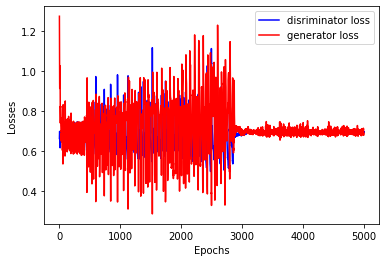

In [6]:
plt.plot(history.history['d_loss'], color='blue', label='disriminator loss')
plt.plot(history.history['g_loss'], color='red', label='generator loss')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()

In [7]:
make_animation((data[:, 0], data[:, 1]), generated_point_list)